In [1]:
#import libraries, etc. 
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import statsmodels.api as sm
import statistics
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
# Load data
data = pd.read_csv('churn_clean.csv')

In [3]:
#describe data
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [4]:
contingency = pd.crosstab(data['Churn'], data['Contract']) 
contingency

Contract,Month-to-month,One year,Two Year
Churn,,,
No,3422,1795,2133
Yes,2034,307,309


In [5]:
#chi-square test
contingency_table = pd.crosstab(data['Contract'], data['Churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 718.5915805949758
P-value: 9.116348157571405e-157


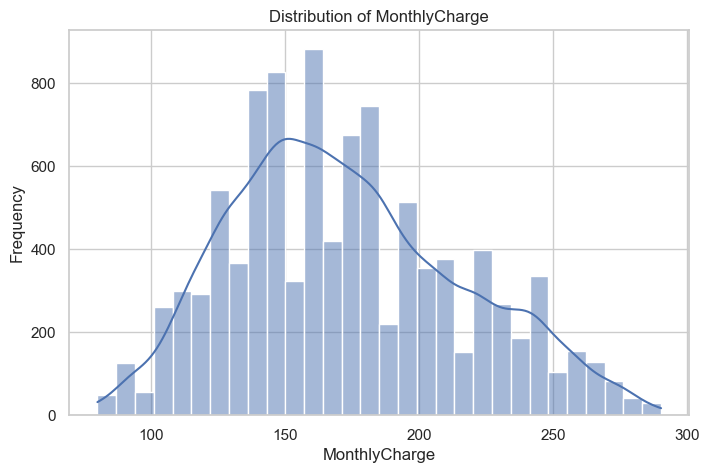

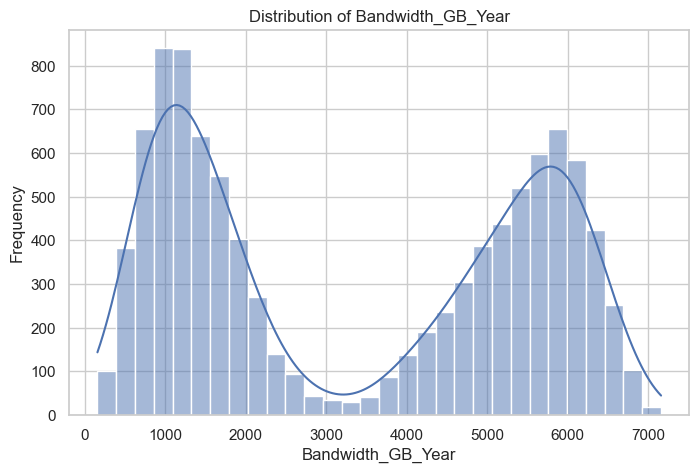

In [6]:
# Style
sns.set(style="whitegrid")

# Continuous Variables
continuous_vars = ['MonthlyCharge', 'Bandwidth_GB_Year']

# Plotting histograms for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

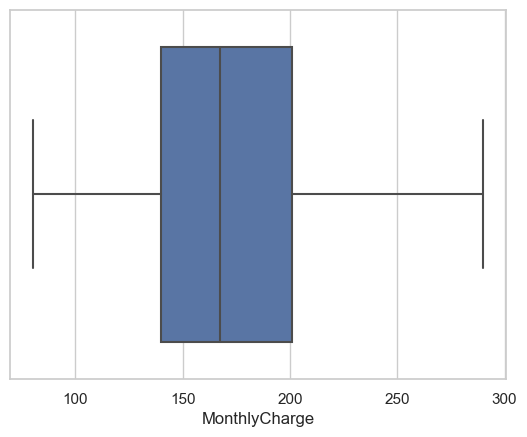

In [7]:
sns.boxplot(x=data['MonthlyCharge'])
plt.show()

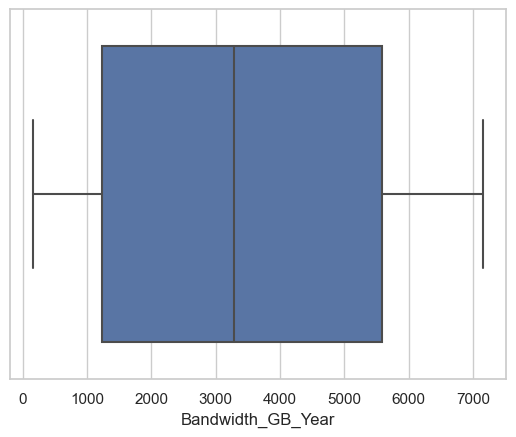

In [8]:
sns.boxplot(x=data['Bandwidth_GB_Year'])
plt.show()

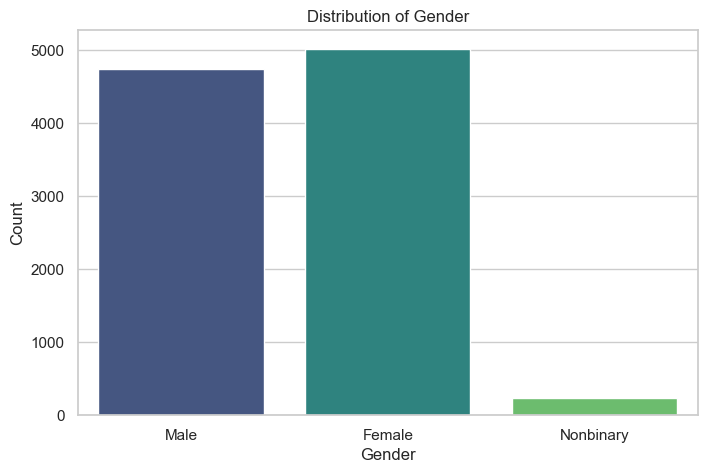

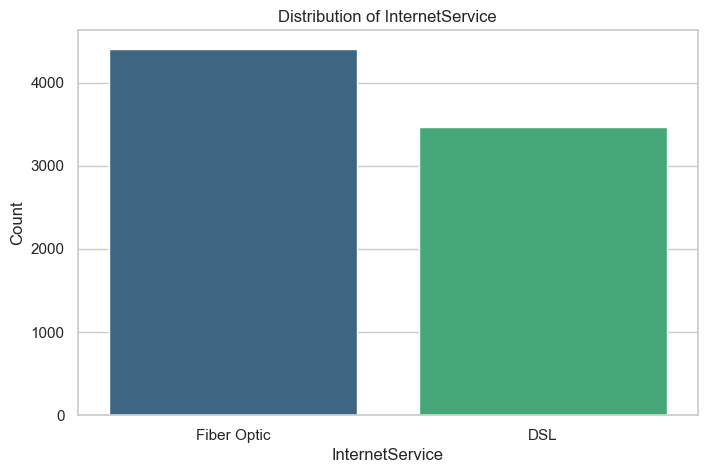

In [9]:
# Categorical Variables
categorical_vars = ['Gender', 'InternetService']

# Plotting bar charts for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, data=data, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

In [10]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


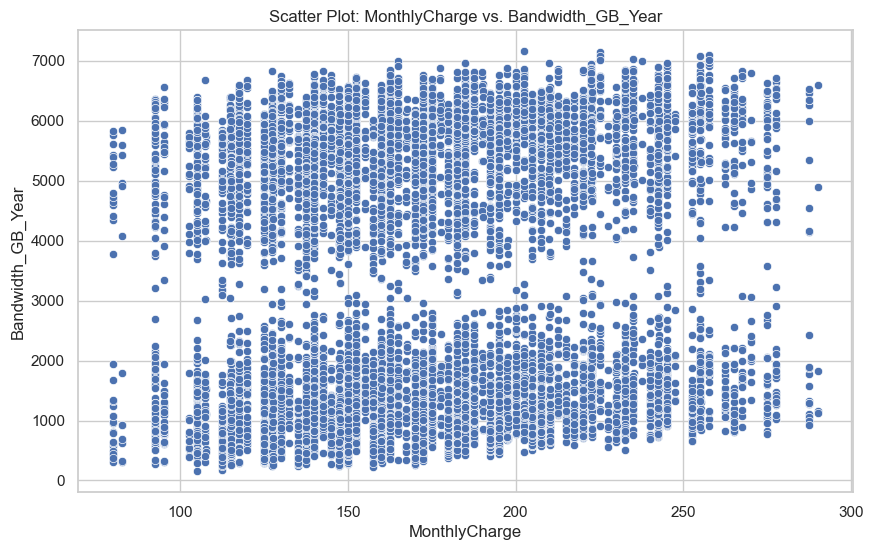

In [11]:
#Continuous-Continuous:
# Scatter plot for MonthlyCharge vs. Bandwidth_GB_Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharge', y='Bandwidth_GB_Year', data=data)
plt.title('Scatter Plot: MonthlyCharge vs. Bandwidth_GB_Year')
plt.xlabel('MonthlyCharge')
plt.ylabel('Bandwidth_GB_Year')
plt.show()


In [12]:
# Create dataframe for heatmap bivariate analysis of correlation
churn_bivariate = data[['MonthlyCharge', 'Bandwidth_GB_Year']]

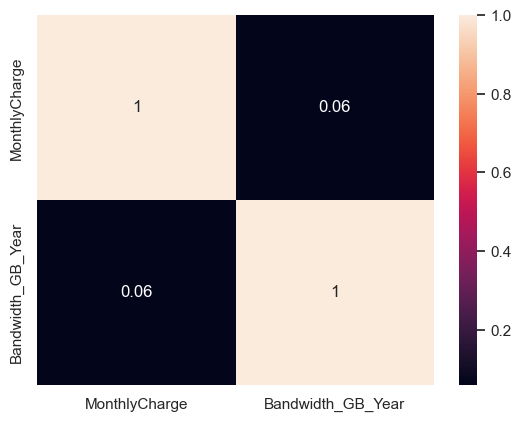

In [13]:
sns.heatmap(churn_bivariate.corr(), annot=True)
plt.show()

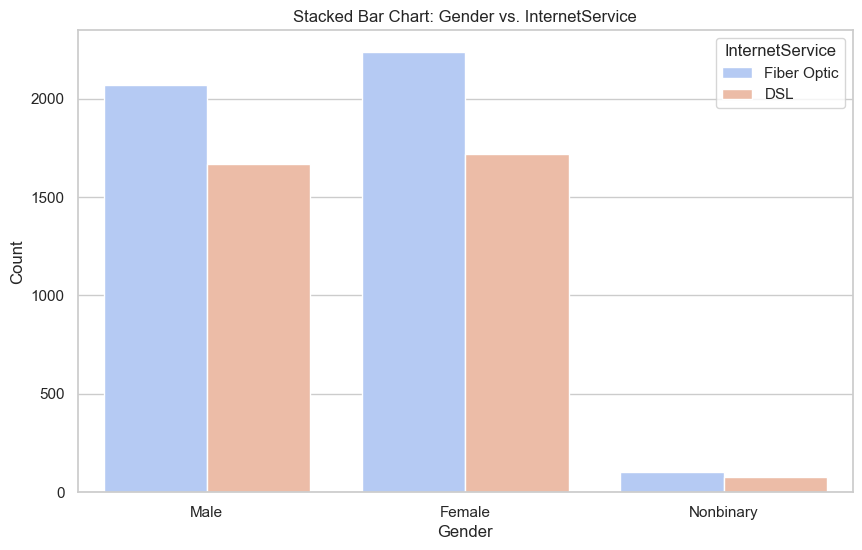

In [14]:
# Stacked bar chart for Gender vs. InternetService
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='InternetService', data=data, palette='coolwarm')
plt.title('Stacked Bar Chart: Gender vs. InternetService')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='InternetService', loc='upper right')
plt.show()
